## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 12 #

### esercizio 12.1

Lo scopo di questo esercizio era modificare il codice seguente per cercare di migliorare la loss e quindi per avere una classificazione migliore, aumentando il numero di epoche fino ad un valore accettabile e cercando di variare gli ottimizzatori.

In [ ]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [ ]:
#LOAD AND PROCESS DATA_____________________________________________________________________________
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

## look at an example of data point
#print('an example of a data point with label', Y_train[20])
## matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#DEFINE THE NEURAL NET AND ITS ARCHITECTURE_______________________________________________________
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

#CHOOSE THE OPTIMIZER AND THE COST FUNCTION________________________________________________________
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [ ]:
#TRAIN THE MODEL____________________________________________________________________________________
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))


Test loss: 0.15718486905097961
Test accuracy: 0.9503999948501587


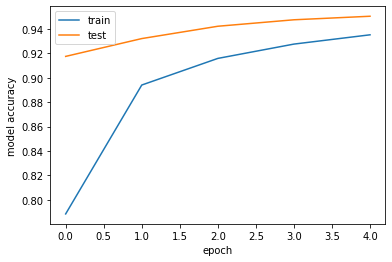

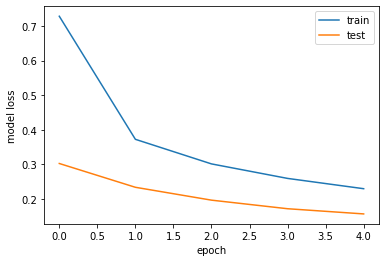

In [ ]:
#EVALUATE MODEL PERFORMANCE ON UNSEEN DATA__________________________________________________________
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

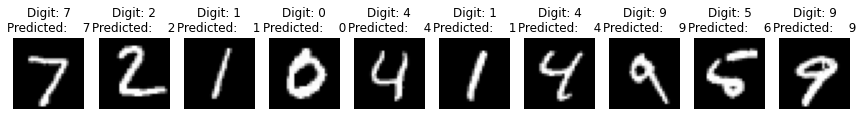

In [ ]:
#PREDICTION AND DIGIT________________________________________________________________________________
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

prima modifica è stata quella di aumentare le epoche

EPOCHE = 15

In [ ]:
#LOAD AND PROCESS DATA_____________________________________________________________________________
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

## look at an example of data point
#print('an example of a data point with label', Y_train[20])
## matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#DEFINE THE NEURAL NET AND ITS ARCHITECTURE_______________________________________________________
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

#CHOOSE THE OPTIMIZER AND THE COST FUNCTION________________________________________________________
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [ ]:
#TRAIN THE MODEL____________________________________________________________________________________
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))


Test loss: 0.08638862520456314
Test accuracy: 0.9726999998092651


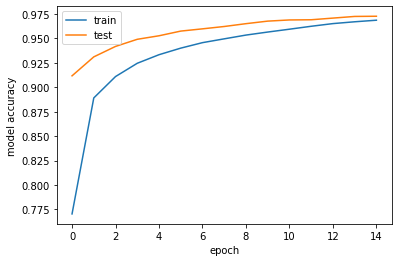

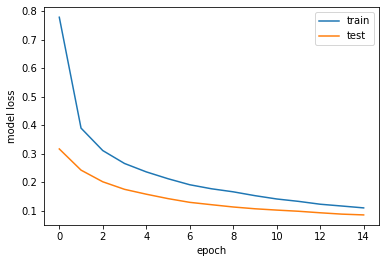

In [ ]:
#EVALUATE MODEL PERFORMANCE ON UNSEEN DATA__________________________________________________________
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

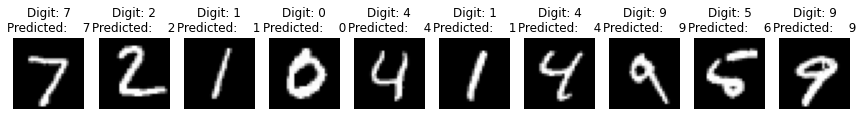

In [ ]:
#PREDICTION AND DIGIT________________________________________________________________________________
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Si può notare che dai grafici della loss e della'accuratezza che vi è stato sicuramente un miglioramento ma i valori non si sono assestati, è stato allora ancora aumentato il numeor di epoche

EPOCHE = 50

In [ ]:
#LOAD AND PROCESS DATA_____________________________________________________________________________
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

## look at an example of data point
#print('an example of a data point with label', Y_train[20])
## matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#DEFINE THE NEURAL NET AND ITS ARCHITECTURE_______________________________________________________
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

#CHOOSE THE OPTIMIZER AND THE COST FUNCTION________________________________________________________
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [ ]:
#TRAIN THE MODEL____________________________________________________________________________________
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))


Test loss: 0.056848131120204926
Test accuracy: 0.9836999773979187


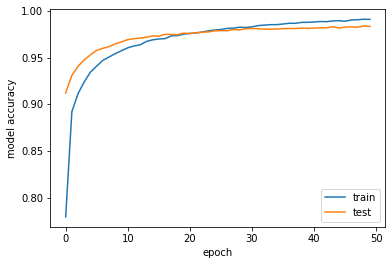

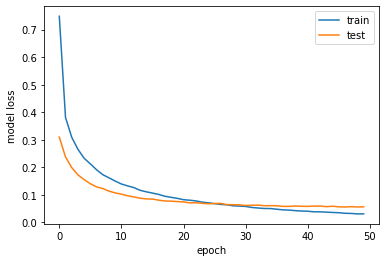

In [ ]:
#EVALUATE MODEL PERFORMANCE ON UNSEEN DATA__________________________________________________________
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

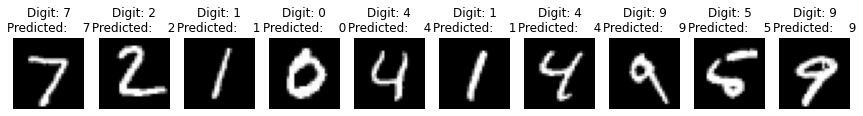

In [ ]:
#PREDICTION AND DIGIT________________________________________________________________________________
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In questo caso si può notare come sia l'accuratezza sia la loss sui dati di test si stabilizzi, oltretutto attorno ad un valore migliore rispetto ai casi precedenti. Si procede con il test di vari ottimizzatori.

PROVA CON VARI OTTIMIZZATORI



OPTIMIZER: <keras.optimizer_v2.gradient_descent.SGD object at 0x7fc57b950290>_________________________________________


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.

Test loss: 0.06039481982588768
Test accuracy: 0.9814000129699707


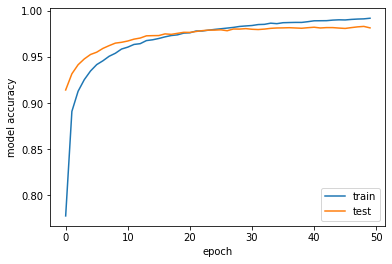

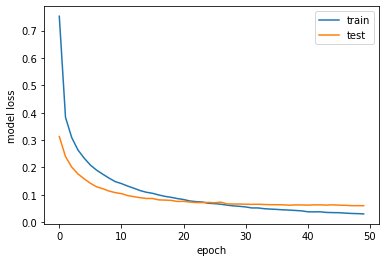

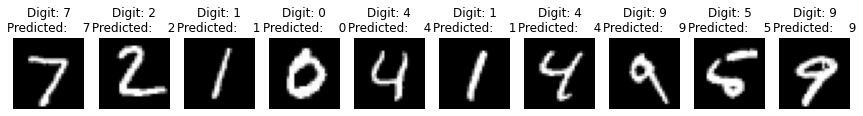



OPTIMIZER: <keras.optimizer_v2.adagrad.Adagrad object at 0x7fc57b950390>_________________________________________


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.

Test loss: 0.15221834182739258
Test accuracy: 0.9549000263214111


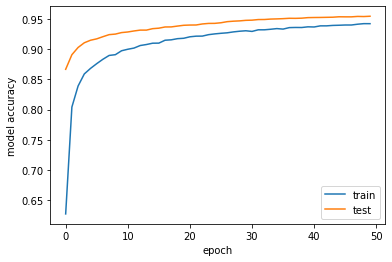

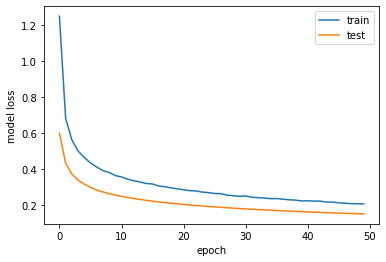

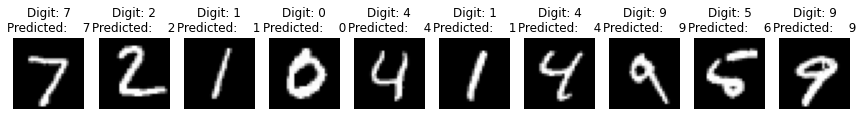



OPTIMIZER: <keras.optimizer_v2.adadelta.Adadelta object at 0x7fc57b9503d0>_________________________________________


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.

Test loss: 0.34904325008392334
Test accuracy: 0.9132000207901001


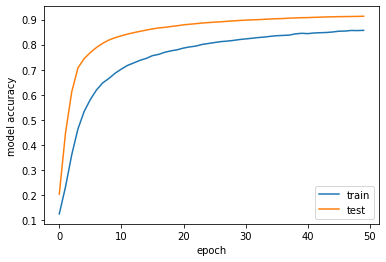

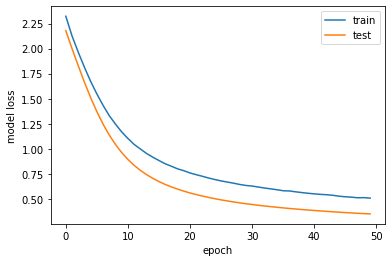

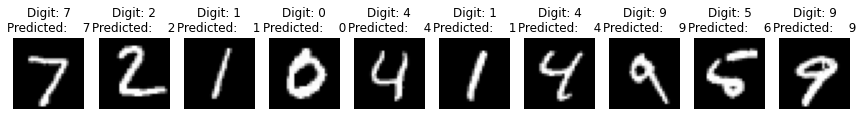



OPTIMIZER: <keras.optimizer_v2.adamax.Adamax object at 0x7fc57b950410>_________________________________________


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.

Test loss: 0.07742290943861008
Test accuracy: 0.984000027179718


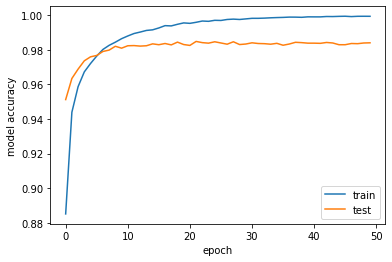

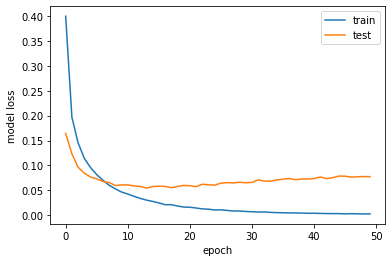

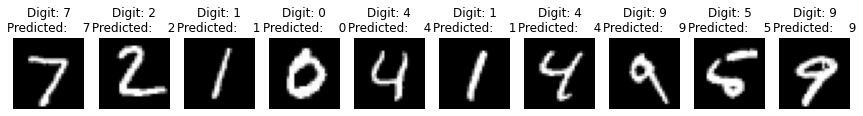

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

nome = [SGD(), Adagrad(), Adadelta(), Adamax()]
for optiname in nome:
  #LOAD AND PROCESS DATA_____________________________________________________________________________
  from keras.datasets import mnist
  #DEFINE THE NEURAL NET AND ITS ARCHITECTURE_______________________________________________________
  from keras.models import Sequential
  from keras.layers import Dense, Dropout

  # training parameters
  batch_size = 32
  epochs = 50

  def create_DNN():
      # instantiate model
      model = Sequential()
      # add a dense all-to-all relu layer
      model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
      # add a dense all-to-all relu layer
      model.add(Dense(100, activation='relu'))
      # apply dropout with rate 0.5
      model.add(Dropout(0.5))
      # soft-max layer
      model.add(Dense(num_classes, activation='softmax'))
      
      return model

  #CHOOSE THE OPTIMIZER AND THE COST FUNCTION________________________________________________________
  def compile_model(custom_object):
      # create the model
      model=create_DNN()
      # compile the model
      model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=custom_object,
                    metrics=['acc'])
      return model

  #____________________________________________________________________________________________________
  # input image dimensions
  img_rows, img_cols = 28, 28 # number of pixels 
  # output
  num_classes = 10 # 10 digits
  print('\n\nOPTIMIZER: '+str(optiname)+'_________________________________________\n\n')
  # the data, split between train and test sets
  (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

  print('X_train shape:', X_train.shape)
  print('Y_train shape:', Y_train.shape)

  # reshape data, it could depend on Keras backend
  X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
  X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
  print('X_train shape:', X_train.shape)
  print('X_test shape:', X_test.shape)
  print()

  # cast floats to single precision
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # rescale data in interval [0,1]
  X_train /= 255
  X_test /= 255

  # convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
  Y_train = keras.utils.to_categorical(Y_train, num_classes)
  Y_test = keras.utils.to_categorical(Y_test, num_classes)
  print('... and with label', Y_train[20], 'after to_categorical')
  print()
  print('X_train shape:', X_train.shape)
  print('Y_train shape:', Y_train.shape)

  print('Model architecture created successfully!')

  print('Model compiled successfully and ready to be trained.')

  #TRAIN THE MODEL____________________________________________________________________________________

  # create the deep neural net
  model_DNN = compile_model(optiname)

  # train DNN and store training info in history
  history = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(X_test, Y_test))

  #EVALUATE MODEL PERFORMANCE ON UNSEEN DATA__________________________________________________________
  # evaluate model
  score = model_DNN.evaluate(X_test, Y_test, verbose=0)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # look into training history

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.ylabel('model accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('model loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

  #PREDICTION AND DIGIT________________________________________________________________________________
  #X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
  predictions = model_DNN.predict(X_test)

  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

  plt.figure(figsize=(15, 15)) 
  for i in range(10):    
      ax = plt.subplot(2, 10, i + 1)    
      plt.imshow(X_test[i, :, :, 0], cmap='gray')    
      plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
      plt.axis('off') 
  plt.show()
  keras.backend.clear_session()

Nei grafici precedenti sono riassunti i casi di diversi ottimizzatori. I risultati di loss e accuratezza migliori sono stati ottenuti con SGD() e Adamax(), rispettivamente con valori di 0.06039 e 0.98140 per lo stochastic gradient descent e 0.07742 e 0.98400 per l'adamax. Per quest'ultimo l'andamento della accuratezza si stabilizza attorno il 98% mentre la loss sui dati di test dopo le prime 10 epoche cresce lentamente, mentre quella sui dati di training continua a decrescere, come è naturale aspettarsi. L'andamento della loss di test fa pensare ad un possibile overfitting.

Gli altri due ottimizzatori performano peggio, con loss 0.15221 e accuratezza 0.95490 per l'ottimizzatore Adagrad e loss 0.34904 e accuratezza 0.91320 per l'Adadelta.

### esercizio12.2

In questo esercizio è stata cambiata la struttura della DNN per renderla una CNN, ovvero una rete neurale convoluzionale.
Sono stati aggiunti 10 Conv2D, poi un layer di Maxpooling2D, poi un atro layer qusta volta di 20 Conv2D e un altro Maxpooling2D. Successivamente un Flatten, un layer di 80 neuroni, uno di 60 un dropout e per ultimo il softmax.

In [ ]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - acc: 0.9911

Test loss: 0.029539022594690323
Test accuracy: 0.991100013256073


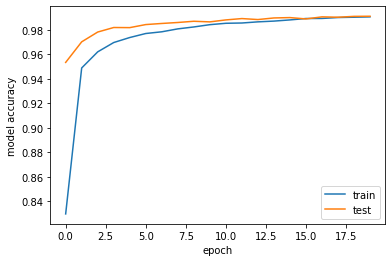

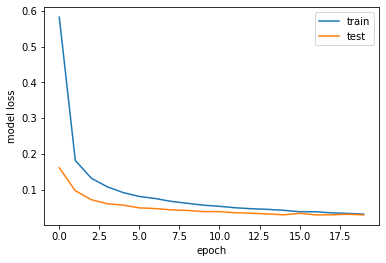

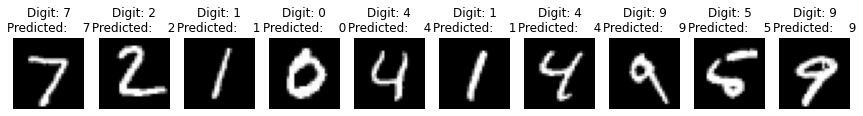

In [ ]:
#LOAD AND PROCESS DATA_____________________________________________________________________________
from keras.datasets import mnist
#DEFINE THE NEURAL NET AND ITS ARCHITECTURE_______________________________________________________
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

# training parameters
batch_size = 32
epochs = 20

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

#############################################################################################################################à
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Conv2D(20, kernel_size=(5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(80, activation='tanh'))
    model.add(Dense(60, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model
##############################################################################################################################

#CHOOSE THE OPTIMIZER AND THE COST FUNCTION________________________________________________________
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

nome = [SGD(), Adam(), RMSprop(), Adagrad(), Adadelta(), Adam(), Adamax(), Nadam()]

def compile_model(custom_object):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=custom_object,
                  metrics=['acc'])
    return model

#____________________________________________________________________________________________________

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)


# you will need the following for Convolutional Neural Networks
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

print('Model architecture created successfully!')

print('Model compiled successfully and ready to be trained.')

#TRAIN THE MODEL____________________________________________________________________________________

## create the deep neural net
#model_DNN = compile_model(nome[0])

## train DNN and store training info in history
#history = model_DNN.fit(X_train, Y_train,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#          validation_data=(X_test, Y_test))

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

#EVALUATE MODEL PERFORMANCE ON UNSEEN DATA__________________________________________________________
# evaluate model
#score = model_DNN.evaluate(X_test, Y_test, verbose=1)

## print performance
#print()
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])


# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#PREDICTION AND DIGIT________________________________________________________________________________
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

E' interessante notare come con una DCNN si siano riusciti ad ottenere valori di accuratezza e loss migliori delle altre reti neurali nonostante il numero di epoche sia 2/5 dei precedenti casi. 

### esercizio12.3

E' stato poi utilizzato la stessa rete neurale per una analisi di dati non presenti nel MNIST, ma creati con GIMP. In aggiunta a questi sono state create diverse varianti per vedere come la rete neurale reagisce a rotazioni e traslazioni dei dati di input.



27




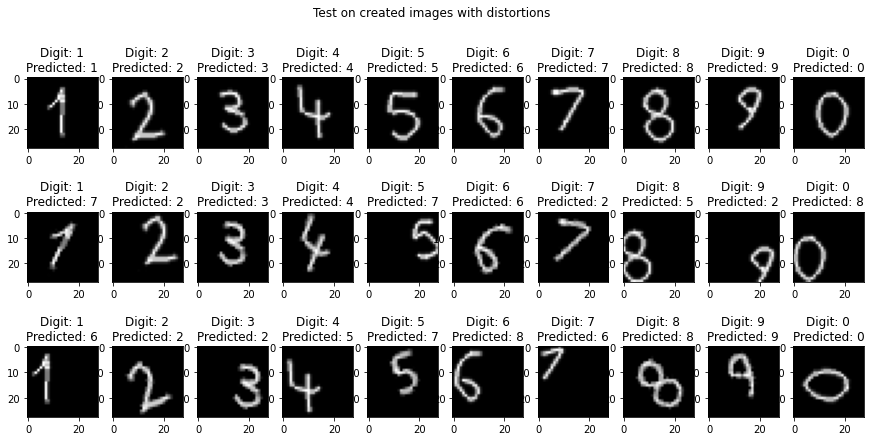

In [ ]:
from PIL import Image
import os

data_test = np.zeros((30,28,28))

for i in range(30):
    digit_filename ="/content/drive/MyDrive/Colab Notebooks/numbers/"+str(i+1) + ".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    data_test[i] = data

data_test /= 255


data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)

predictions = model_CNN.predict(data_test)

fig, axs = plt.subplots(3,10, figsize=(15,7))
fig.suptitle('Test on created images with distortions')

l=0
for i in range(9):    
  for j in range(3):
    axs[j,i].imshow(data_test[l, :, :, 0], cmap='gray')    
    
    axs[j,i].set_title("Digit: {}\nPredicted: {}".format(i+1, np.argmax(predictions[l])))  
    
    #axs[j,i].set_axis('off')
    l=l+1
print('\n\n'+str(l)+'\n\n')
for j in range(3):
  axs[j,9].imshow(data_test[l, :, :, 0], cmap='gray')    
  axs[j,9].set_title("Digit: {}\nPredicted: {}".format(0, np.argmax(predictions[l])))
  l=l+1

    
plt.show()

E' molto interessante notare come per le immagini dove la cifra è centrale e scritta senza rotazioni le predizioni siano tutte corrette, mentre per le cifre a cui è stata sottoposta rotazione e traslazione questo non è vero. La rete neurale non è stata allenata con abbastanza immagini distorte, e quindi sta analizzando input diversi da quelli che riceve di solito. Anche se per alcune cifre sotto rotazione o traslazione non vi sono fraintendimenti, per la maggior parte (il 60%) la classificazione è errata.